In [6]:
import numpy as np
import matplotlib.pyplot as plt
from paths import training_set, test_set
from helpers import load_csv_data
from utilities import standardize, load_csv_title

Load the training set as well as the feature names

In [8]:
y,x,ids = load_csv_data(training_set)
title = load_csv_title(training_set)
print('Data set is of the following shape :' + str(x.shape))
print('The features are : ')
print(title)

Data set is of the following shape :(250000, 30)
The features are : 
['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt']


Determine the correlation heatmap of our data before all preprocessing

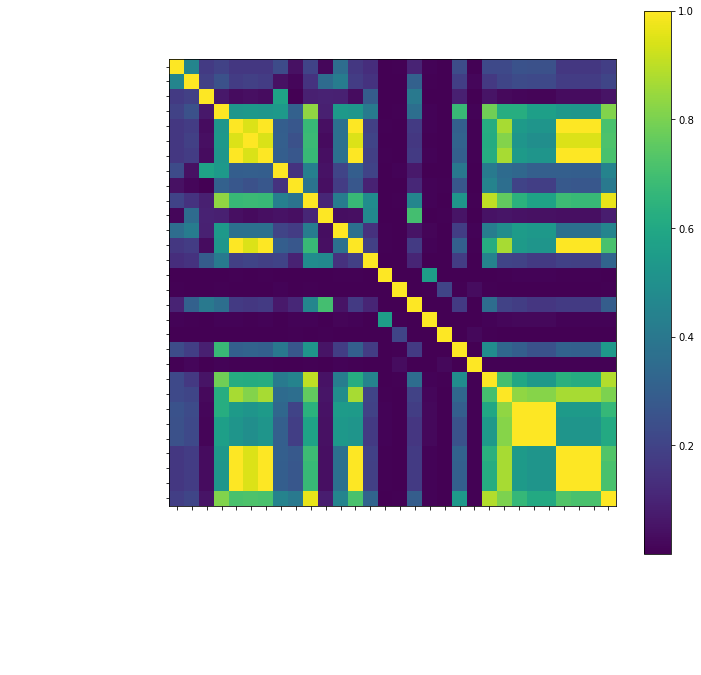

In [9]:
corr = np.abs(np.corrcoef(x,rowvar = False))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.imshow(corr)
plt.colorbar()
plt.xticks(ticks=np.arange(len(title)),labels=title,rotation=90, color = 'white')
plt.yticks(ticks=np.arange(len(title)),labels=title, color = 'white')
plt.show()

Now let's visualize the data distribution feature by feature by showing the box plot for each feature

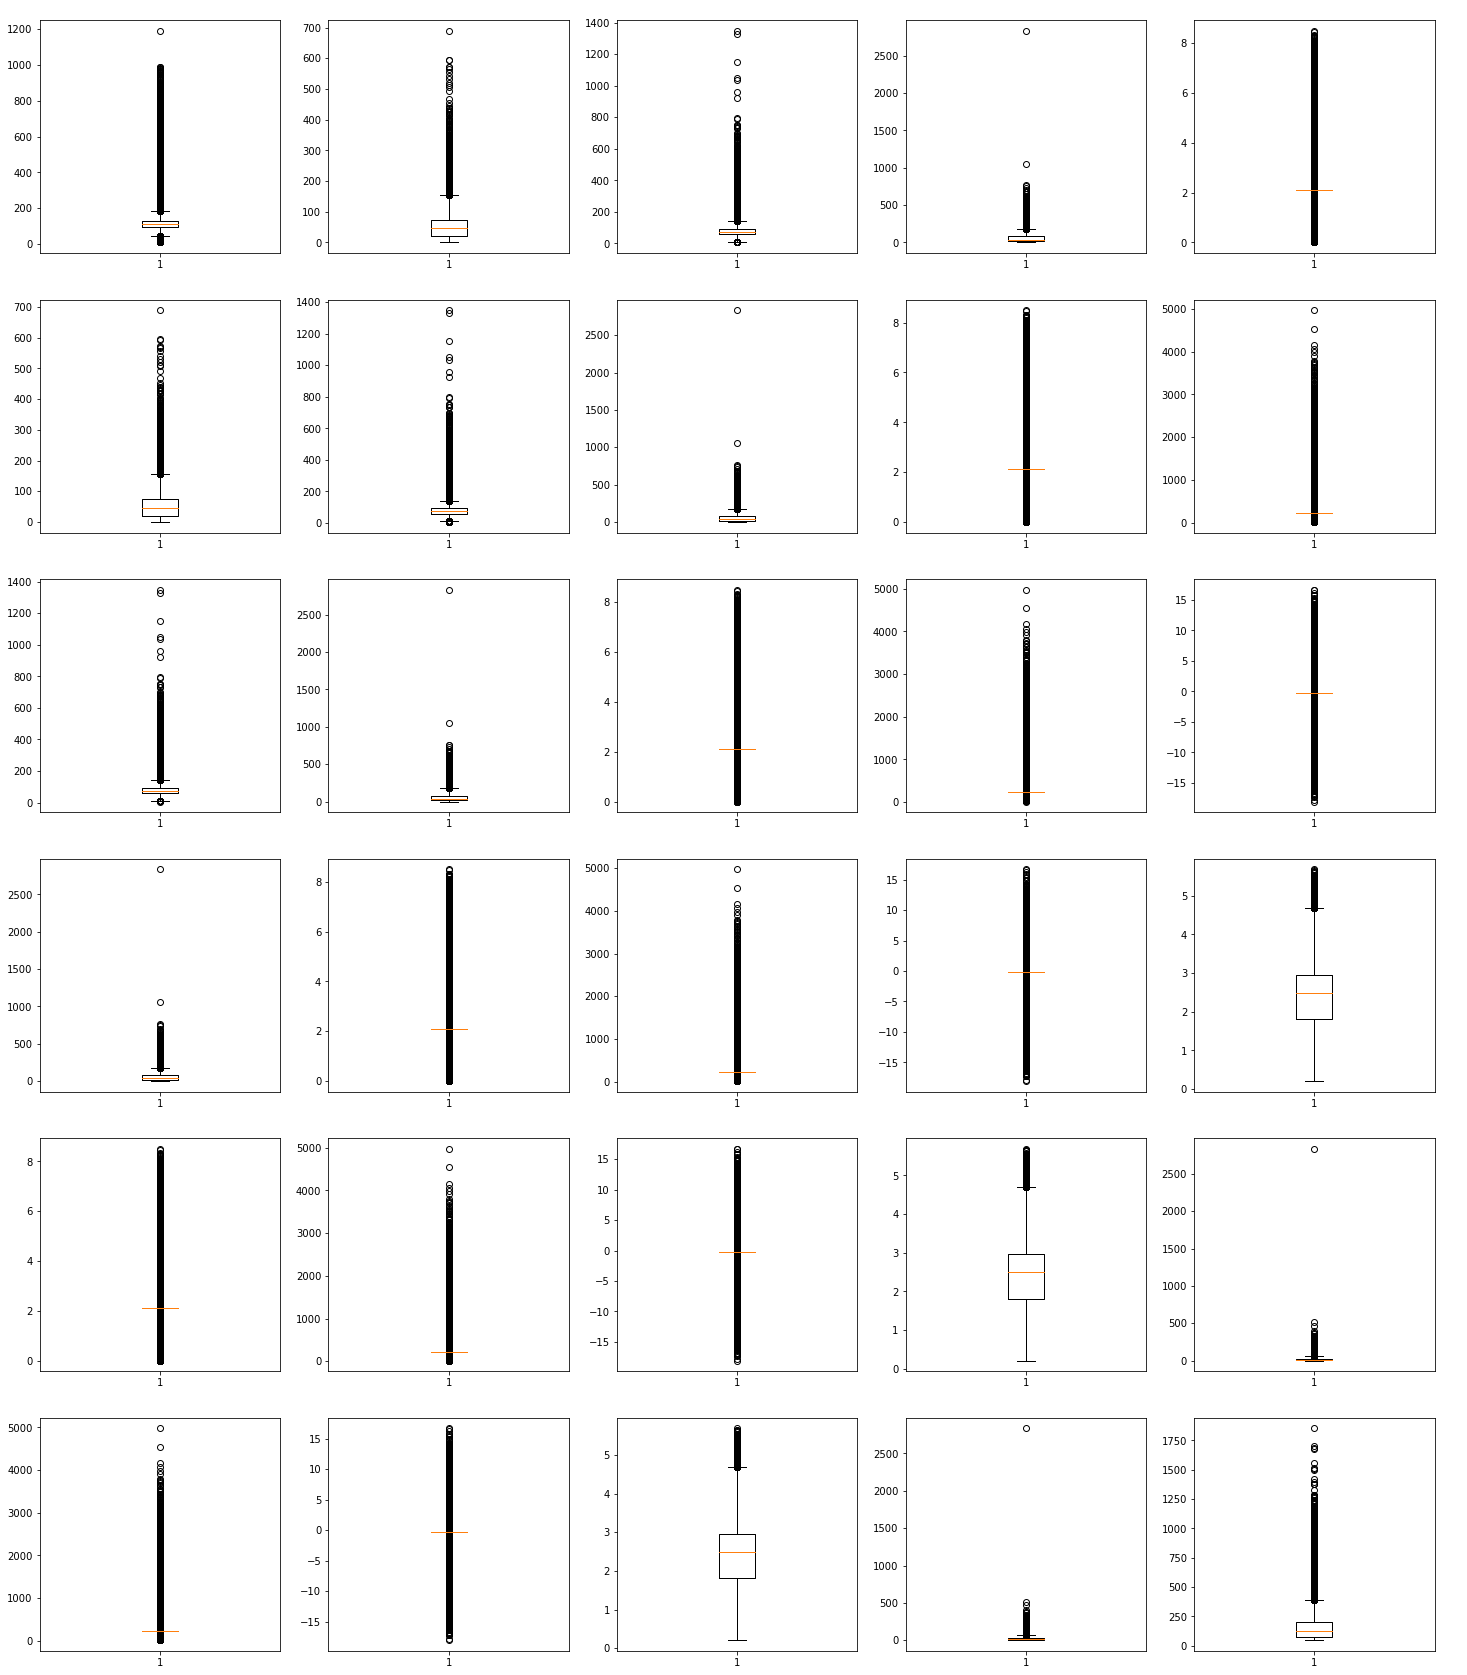

In [10]:
fig, axs = plt.subplots(6, 5, figsize=(25,30))
for i in range(6):
    for j in range(5):
        feature_removed = x[:,i+j][x[:,i+j] != -999]
        median = np.median(feature_removed, axis = 0)
        x[:, i+j][x[:, i+j] == -999] = median
        dict = axs[i,j].boxplot(x[:,i+j].T)
        qs = np.quantile(feature_removed, np.array([0.25, 0.5, 0.75]), axis = 0)
        ir = qs[2]-qs[0]
        lower_limit = qs[0] - (1.5*ir)
        upper_limit = qs[2] + (1.5*ir)
        low_ol = x[:, i+j][x[:, i+j] < lower_limit]
        up_ol = x[:, i+j][x[:, i+j] > upper_limit]
        nb_outliers = len(low_ol)+len(up_ol)
        #print('nb outliers :', nb_outliers)
        fraction_outliers = nb_outliers/len(x[:,i+j])
        #print('percentage outliers :', fraction_outliers*100)
        axs[i,j].set_title(str(title[i+j]) + ' ,Percentage of outliers :' +str(fraction_outliers*100), color = 'white', fontsize = 'small')


Now let's visualize the distribution of the data according to whether -1 or 1 label.

Text(0.5, 1.005, 'Data distribution according to whether noise or signal for each feature')

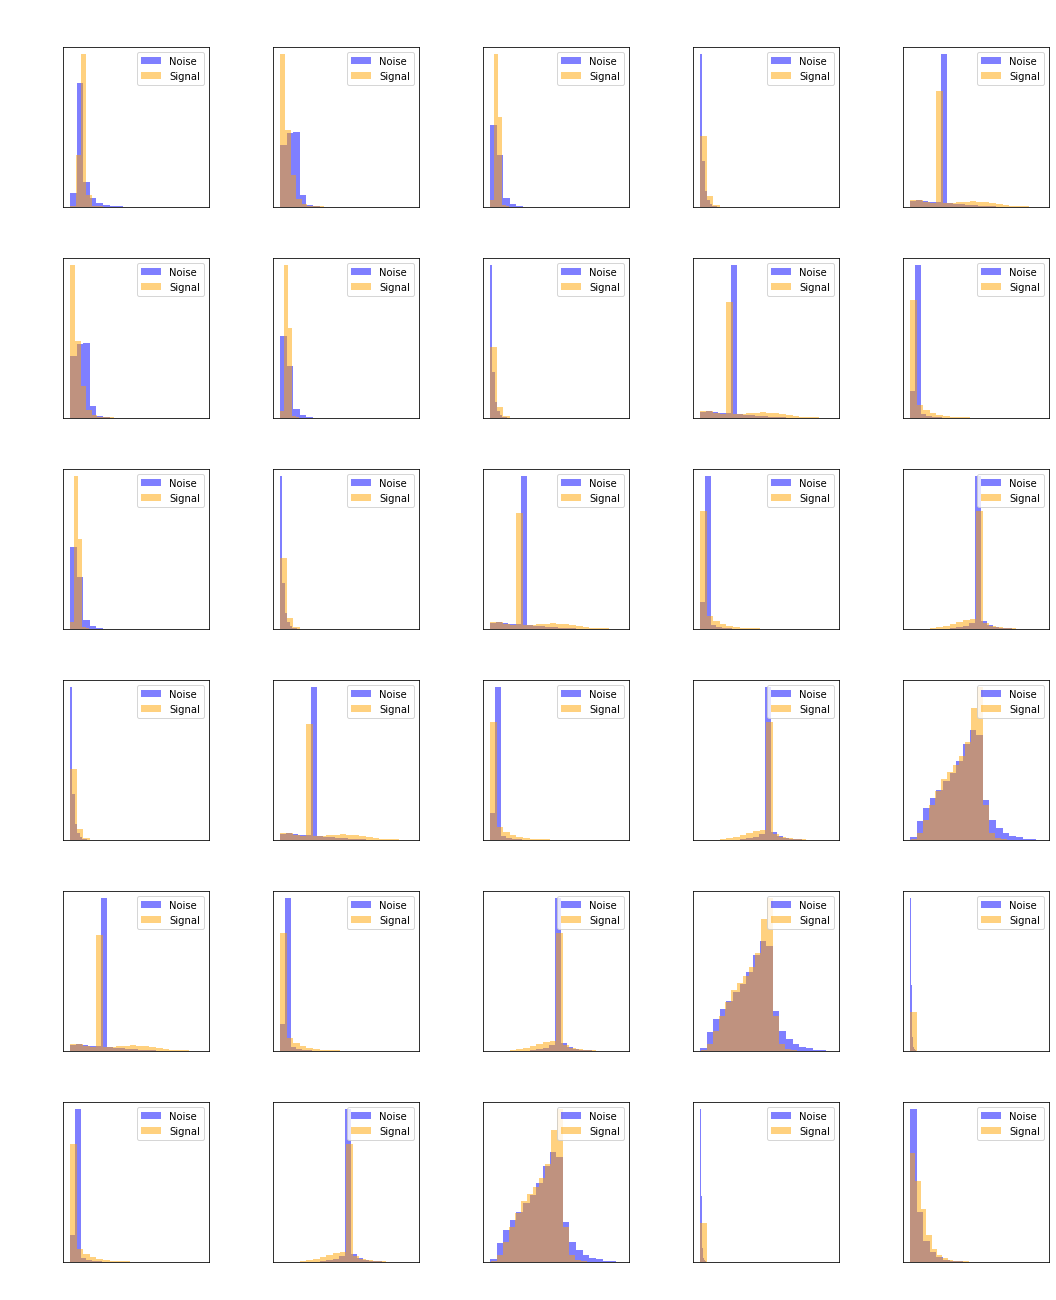

In [11]:
x_0 = np.delete(x, np.where(y==1), axis = 0)
x_1 = np.delete(x, np.where(y==-1), axis = 0)
fig, axs = plt.subplots(6, 5, figsize=(15,18))
fig.tight_layout(pad=3)
for i in range(6):
    for j in range(5):
        x_0_ = x_0[:,i+j][x_0[:,i+j] != -999]
        x_1_ = x_1[:,i+j][x_1[:,i+j] != -999]
        n0,bins0,patch0 = axs[i,j].hist(x_0_, bins = 20, density = True, alpha = 0.5, color = 'blue', label = 'Noise')
        n1,bins1,patch1 = axs[i,j].hist(x_1_, bins = 20, density = True, alpha = 0.5, color = 'orange', label = 'Signal')
        axs[i,j].legend()
        axs[i,j].set_title(title[i+j], color = 'white')
        axs[i,j].set_xlabel('Data point value', color = 'white')
        axs[i,j].set_ylabel('Density', color = 'white')
        axs[i,j].tick_params(axis='x', colors='white')
        axs[i,j].tick_params(axis='y', colors='white')
fig.suptitle('Data distribution according to whether noise or signal for each feature', color = 'white', fontsize = 'xx-large', y =1.005)